In [28]:
from sqlalchemy import create_engine
import pandas as pd

# Create a SQLAlchemy engine
engine = create_engine('sqlite:///social_media_data.db')

# Define the file paths
file_path1 = "/Users/NP/Documents/Project-3/Resources/Data/us_social_media.csv"
file_path2 = "/Users/NP/Documents/Project-3/Resources/Data/social_media-US-monthly-200904-202312.csv"
file_path3 = "/Users/NP/Documents/Project-3/Resources/Data/google_trends_social_media_data.csv"

# Read the CSV files into dataframes
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

# Rename the 'date' column to 'Date' in the third dataframe
df3.rename(columns={'date': 'Date'}, inplace=True)


# Write the dataframes to SQLite tables
df1.to_sql('us_social_media', engine, if_exists='replace', index=False)
df2.to_sql('monthly_us_social_media', engine, if_exists='replace', index=False)
df3.to_sql('google_trends', engine, if_exists='replace', index=False)

180

In [29]:
# Select all records from the 'us_social_media' table
df1 = pd.read_sql_query("SELECT * FROM us_social_media", engine)

# Select all records from the 'monthly_us_social_media' table
df2 = pd.read_sql_query("SELECT * FROM monthly_us_social_media", engine)

# Select all records from the 'google_trends' table
df3 = pd.read_sql_query("SELECT * FROM google_trends", engine)

# Print the first 5 rows of each dataframe
print(df1.head())
print(df2.head())
print(df3.head())

      Date  Facebook  Pinterest  Twitter  StumbleUpon  YouTube  Instagram  \
0  2009-04     20.16        0.0     6.86        36.79      0.0        0.0   
1  2009-05     24.30        0.0     9.95        33.78      0.0        0.0   
2  2009-06     26.48        0.0    10.56        29.65      0.0        0.0   
3  2009-07     29.10        0.0    10.35        33.55      0.0        0.0   
4  2009-08     34.25        0.0    11.15        29.01      0.0        0.0   

   Tumblr  reddit  VKontakte  ...  MySpace  Fark  NowPublic  iWiW  \
0     0.0    8.98        0.0  ...    14.81  0.22       0.04  0.29   
1     0.0    7.62        0.0  ...     8.95  0.44       0.05  2.10   
2     0.0   12.13        0.0  ...     7.66  0.66       0.05  2.35   
3     0.0    9.52        0.0  ...     5.49  0.22       0.03  2.21   
4     0.0    9.37        0.0  ...     4.69  0.40       0.08  2.27   

   news.ycombinator.com  Delicious  orkut  Odnoklassniki  Vimeo  Other  
0                  0.08       0.49   1.75        

In [43]:
# Generate descriptive statistics for the 'us_social_media' table
print(df1.describe())

# Generate descriptive statistics for the 'monthly_us_social_media' table
print(df2.describe())

# Generate descriptive statistics for the 'google_trends' table
print(df3.describe())

         Facebook   Pinterest     Twitter  StumbleUpon     YouTube  \
count  178.000000  178.000000  178.000000   178.000000  178.000000   
mean    69.210056    7.308427    7.266742     5.176854    3.767753   
std     12.722400    4.672744    2.550880     8.729947    2.674020   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%     64.677500    5.105000    5.517500     0.010000    1.405000   
50%     68.935000    7.320000    6.840000     0.385000    3.845000   
75%     75.527500   10.685000    8.750000     5.737500    5.055000   
max     87.830000   16.960000   15.480000    36.790000   11.040000   

        Instagram      Tumblr      reddit   VKontakte    LinkedIn  ...  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  ...   
mean     2.178315    0.979045    1.666629    0.182191    0.224045  ...   
std      3.522951    1.852472    1.793450    0.149130    0.116087  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   

Dropdown(description='US Platform:', options=('Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'YouTube', 'I…

Dropdown(description='Global Platform:', options=('Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'reddit',…

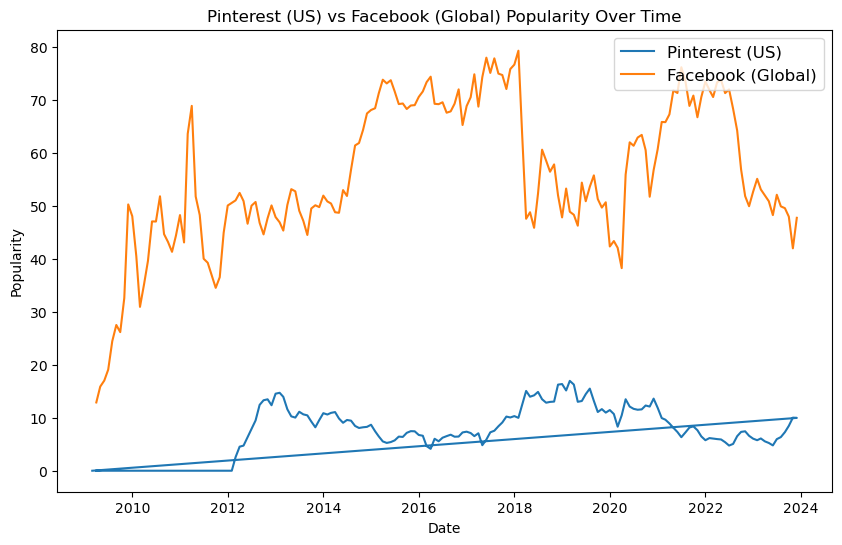

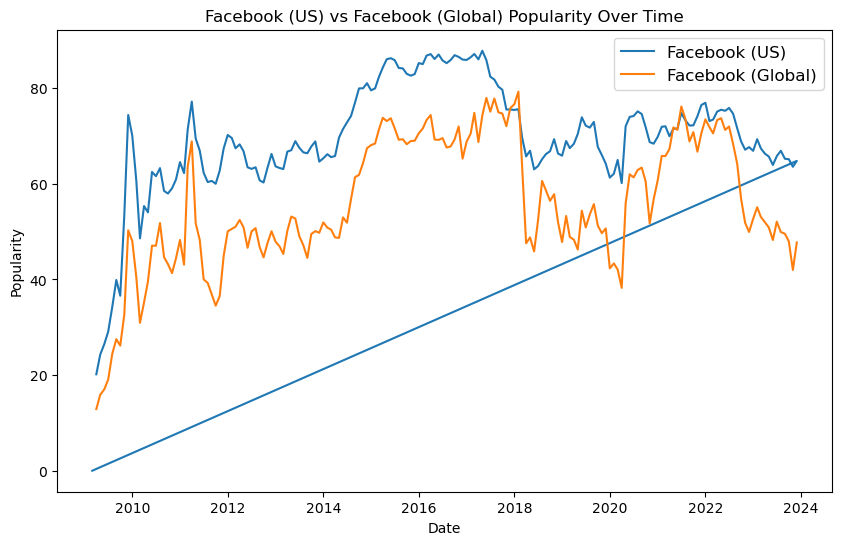

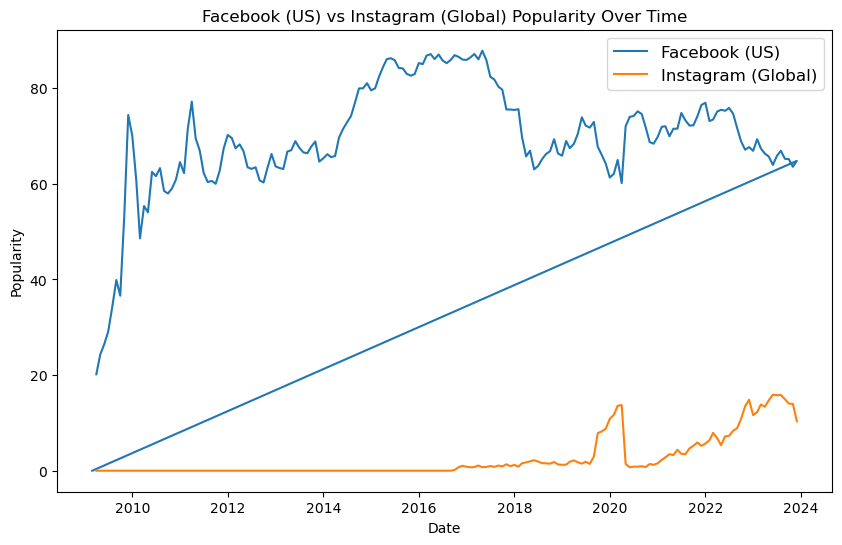

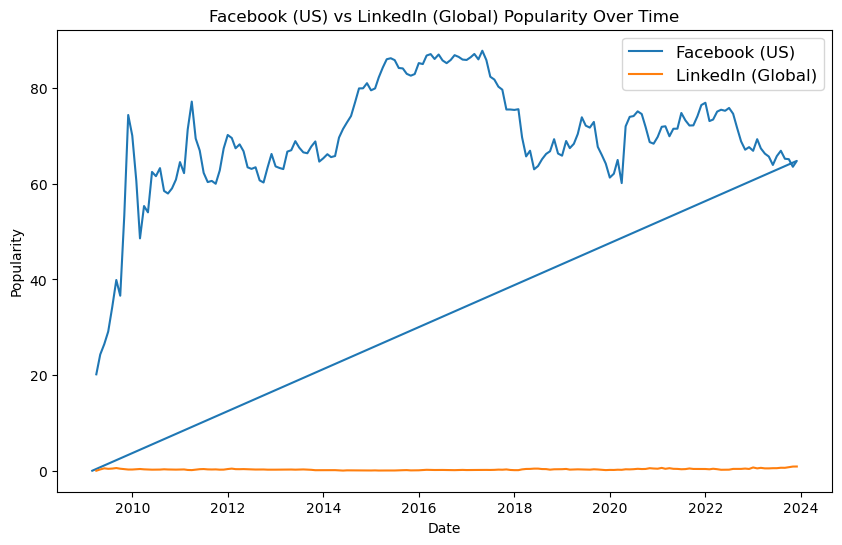

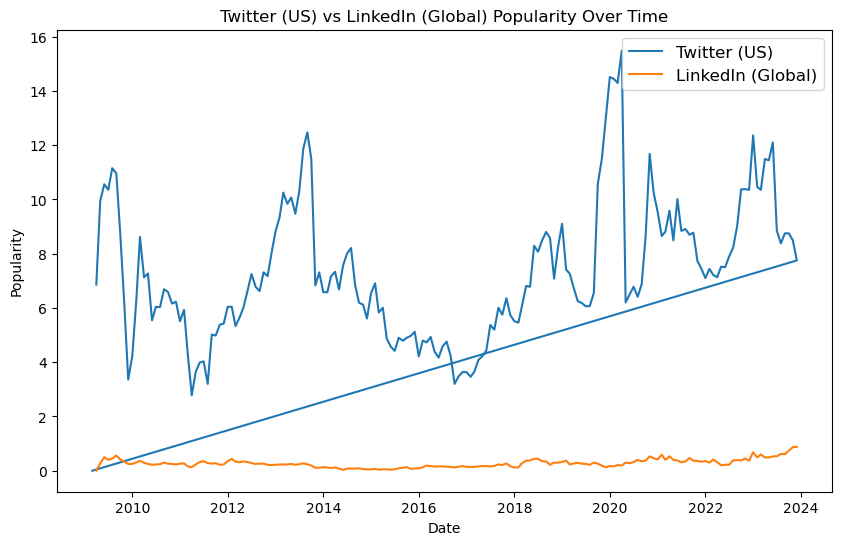

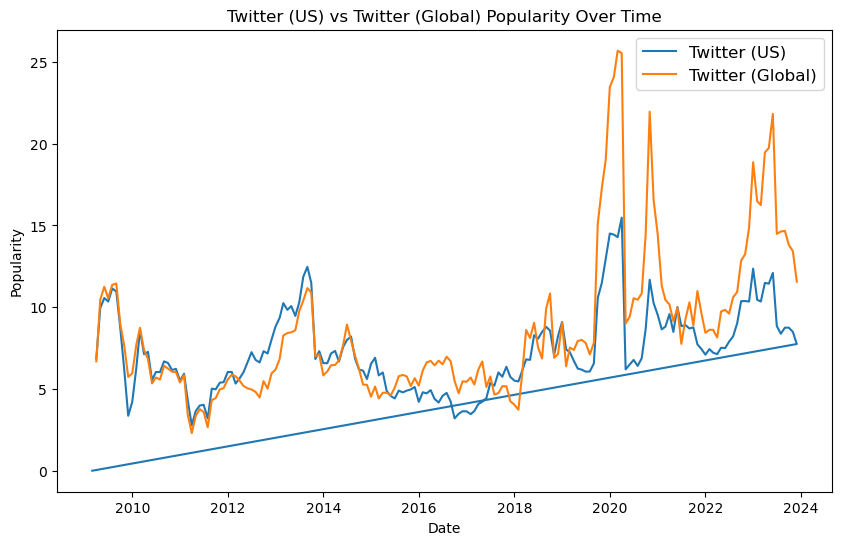

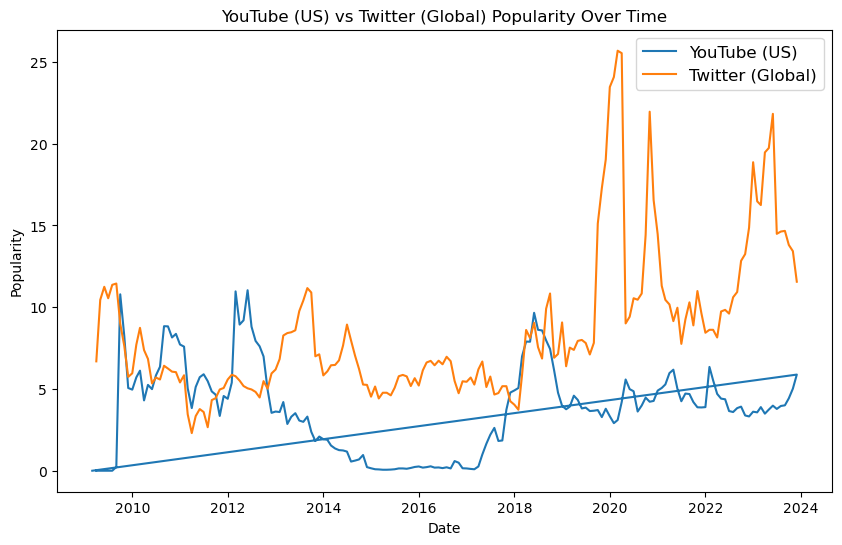

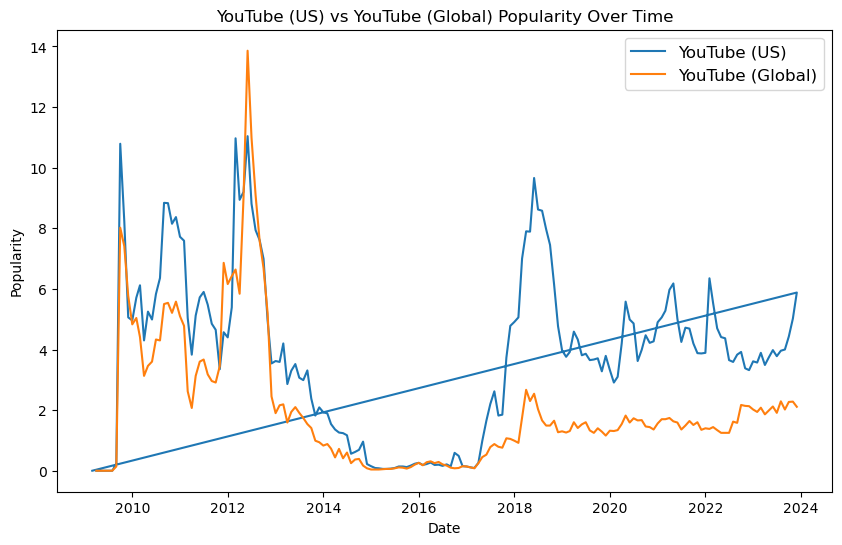

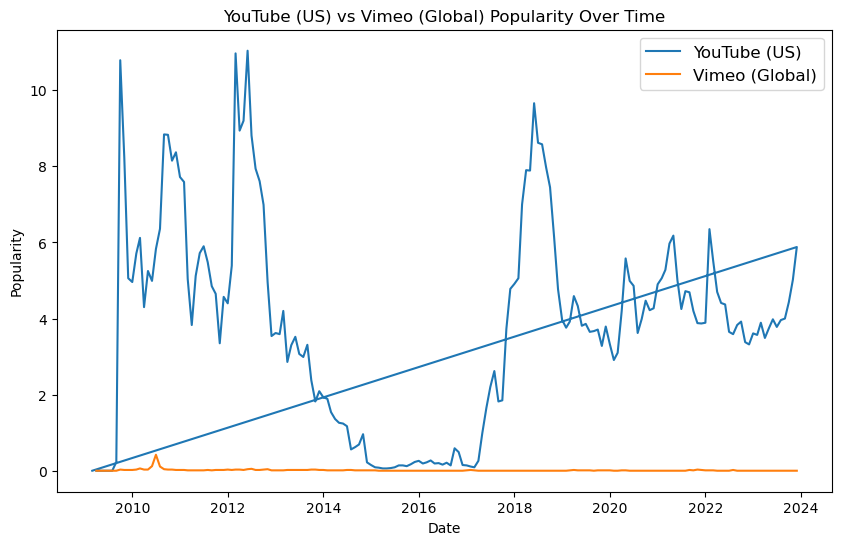

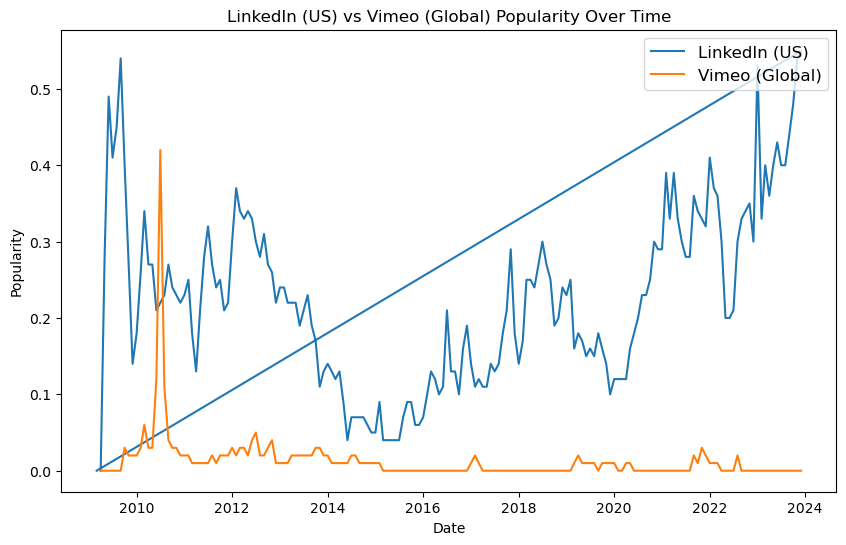

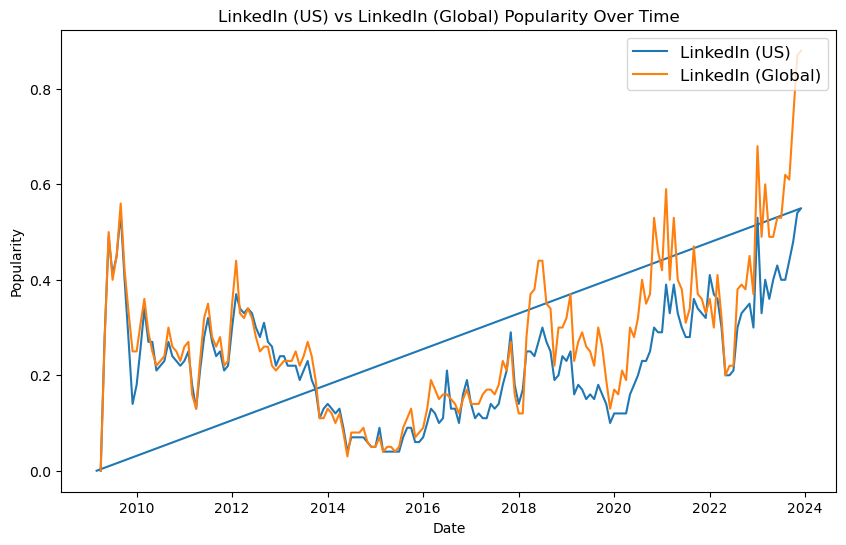

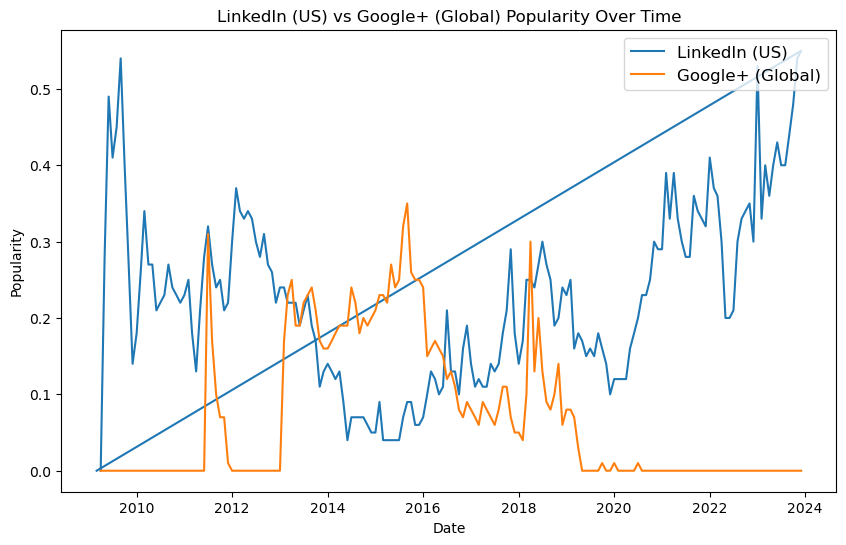

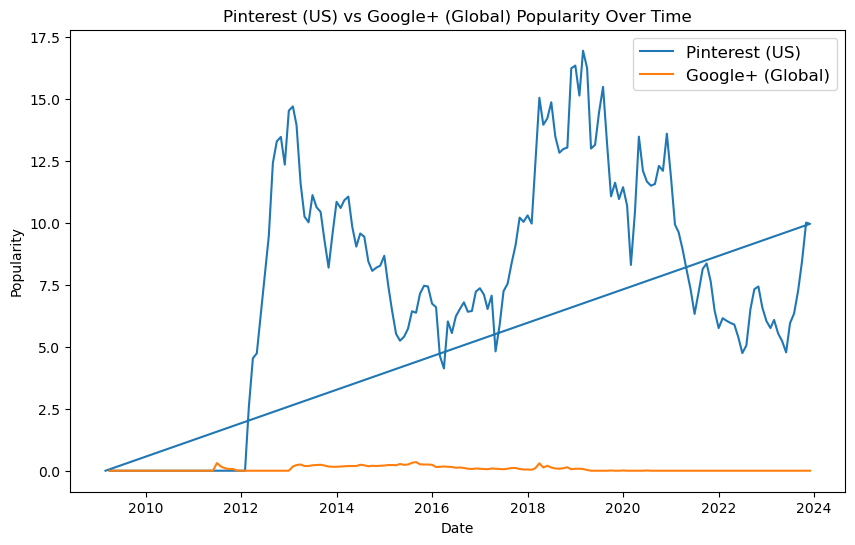

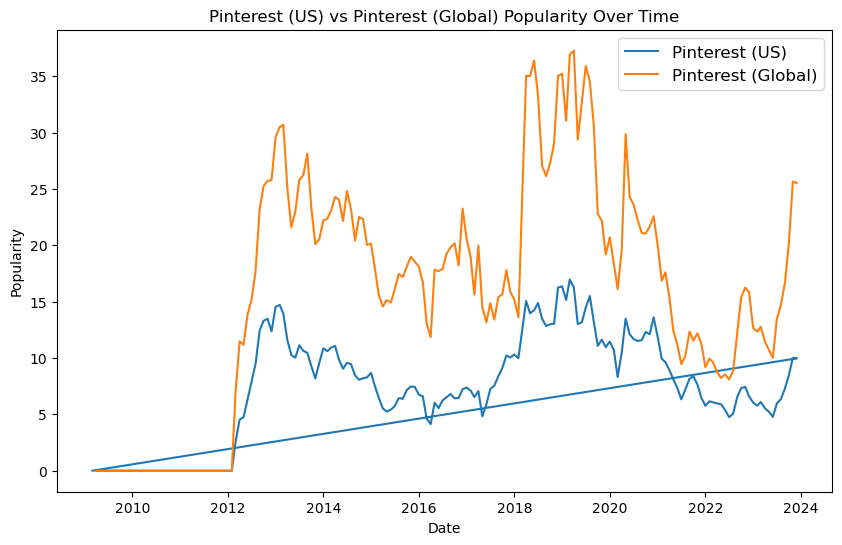

In [37]:
# Create a dropdown menu for the first dataframe (US data)
d1 = widgets.Dropdown(
    options=[col for col in df1.columns if col != 'Date'],
    value=[col for col in df1.columns if col != 'Date'][0],
    description='US Platform:',
)

# Create a dropdown menu for the second dataframe (global data)
d2 = widgets.Dropdown(
    options=[col for col in df2.columns if col != 'Date'],  # Exclude 'Date' from the options
    value=[col for col in df2.columns if col != 'Date'][0],  # Set the initial value to the first option that is not 'Date'
    description='Global Platform:',
)


# Function to plot data
def plot_data(df1, platform1, df2, platform2):
    plt.figure(figsize=(10,6))
    plt.plot(pd.to_datetime(df1['Date']), df1[platform1], label=f'{platform1} (US)')
    plt.plot(pd.to_datetime(df2['Date']), df2[platform2], label=f'{platform2} (Global)')
    plt.title(f'{platform1} (US) vs {platform2} (Global) Popularity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend(loc='upper right', fontsize='large', title_fontsize='20')
    plt.show()

# Function to handle changes in the dropdown menus
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_data(df1, d1.value, df2, d2.value)

d1.observe(on_change)
d2.observe(on_change)

display(d1)
display(d2)